In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

In [30]:
index, mvir, rvir, x, y, z = np.loadtxt("Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T

In [31]:
mvir.shape

(9742,)

In [32]:
mask = np.logical_and((index==580979), (mvir>1e11))

In [33]:
mvir, rvir, x, y, z = mvir[mask], rvir[mask], x[mask], y[mask], z[mask]

In [6]:
mvir.shape

(38,)

In [7]:
mvir

array([2.60e+14, 6.41e+12, 3.23e+12, 2.45e+12, 2.01e+12, 1.05e+12,
       1.04e+12, 9.54e+11, 1.06e+12, 5.62e+11, 4.23e+11, 4.45e+11,
       3.69e+11, 3.69e+11, 3.63e+11, 2.73e+11, 2.46e+11, 2.35e+11,
       2.01e+11, 1.62e+11, 1.55e+11, 1.49e+11, 1.47e+11, 1.50e+11,
       1.34e+11, 1.31e+11, 1.30e+11, 1.19e+11, 1.24e+11, 1.10e+11,
       1.07e+11, 1.19e+11, 1.15e+11, 1.06e+11, 1.01e+11, 1.05e+11,
       1.03e+11, 1.05e+11])

Text(0.5, 1.0, '580979')

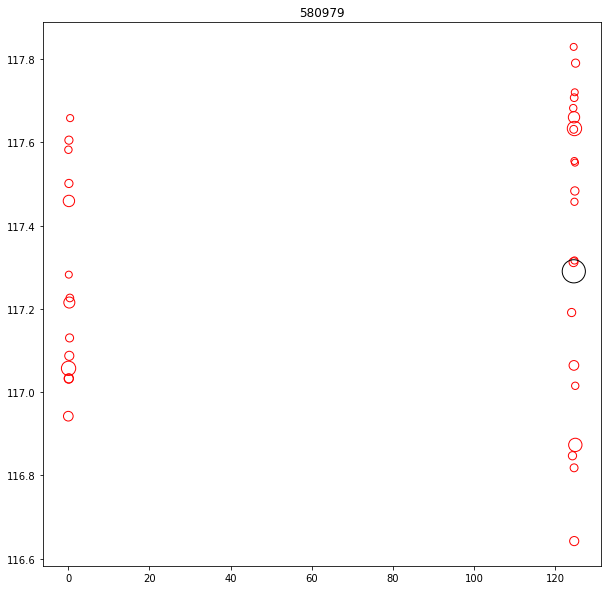

In [41]:
%matplotlib inline
ax = plt.figure(figsize=(10,10))
plt.scatter(x[1:], y[1:], color='none', edgecolor='red', s=rvir[1:]*500)
plt.scatter(x[0],y[0],color='none',edgecolor='black', s=rvir[0]*500)
plt.title('580979')


In [19]:
def plot_3d(x,y,z,rvir):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[1:], y[1:], z[1:], zdir='z', s=rvir[1:]*2500, c='r')
    ax.scatter(x[0], y[0], z[0], zdir='z', s=rvir[0]*2500, c='k')

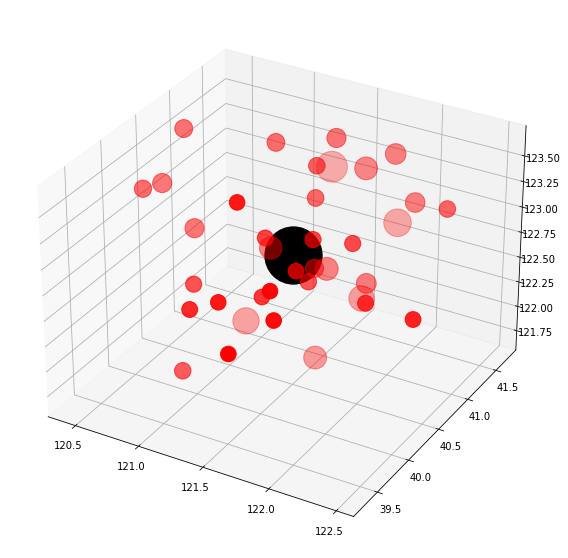

In [20]:
plot_3d(x,y,z,rvir)

In [21]:
np.unique(name)

array([ 46114.,  46115.,  46116.,  73365.,  91207., 118057., 145286.,
       145287., 167510., 167511., 167512., 167513., 206928., 206929.,
       206930., 206931., 250374., 275633., 275634., 275635., 275636.,
       335846., 335847., 363244., 384729., 406861., 406862., 406863.,
       406864., 455011., 455012., 455013., 480875., 504143., 528161.,
       528162., 553785., 553786., 580978., 580979., 612244., 612245.,
       612246., 612247., 644539., 644540., 644541., 644542., 644543.])

In [26]:
name, m, r, x_pos, y_pos, z_pos = np.loadtxt("Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T
def plot_subhalos(index, minmass):
    mask = np.logical_and((name==index), (m>minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    #print(x)
    figure, axes = plt.subplots()
    draw_circle = plt.Circle((x[0], y[0]), rvir[0], fill=False, edgecolor='k')
    axes.add_artist(draw_circle)
    plt.scatter(x[0],y[0],c='k',s=1.5)
    
    for i in range(1, len(x)):
        draw_circle = plt.Circle((x[i], y[i]), rvir[i], fill=False, edgecolor='r')
        axes.add_artist(draw_circle)
        plt.scatter(x[i],y[i],c='k',s=1.5)
        xplotrange = max((x[0]-np.min(x)),(np.max(x)-x[0]))+rvir[0]
        yplotrange = max((y[0]-np.min(y)),(np.max(y)-y[0]))+rvir[0]
        plotrange=max(xplotrange,yplotrange)
        
        axes.set_xlim(x[0]-plotrange, x[0]+plotrange)
        axes.set_ylim(y[0]-plotrange, y[0]+plotrange)
    
    axes.set_aspect(1)

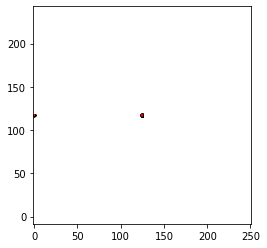

In [27]:
%matplotlib inline
plot_subhalos(580979, 0)

In [43]:
name, m, r, x_pos, y_pos, z_pos = np.loadtxt("Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T

In [162]:
def plot_subhalos_new(index, minmass, ax):
    mask = np.logical_and((name==index), (m>=minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    #print(mvir)
    ax.scatter(x[1:], y[1:], color='none', edgecolor='red', s=rvir[1:]*250)
    ax.scatter(x[0],y[0],color='none',edgecolor='black', s=rvir[0]*250)
    xplotrange = max((x[0]-np.min(x)),(np.max(x)-x[0]))+0.5
    ax.set_xlim(x[0]-xplotrange, x[0]+xplotrange)
    yplotrange = max((y[0]-np.min(y)),(np.max(y)-y[0]))+0.1
    ax.set_ylim(y[0]-yplotrange, y[0]+yplotrange)

In [42]:
def plot_subhalos_new(index, minmass, ax):
    mask = np.logical_and((name==index), (m>=minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    #print(mvir)
    draw_circle = plt.Circle((x[0], y[0]), rvir[0], fill=False, edgecolor='k')
    ax.add_artist(draw_circle)
    ax.scatter(x[0],y[0],c='k',s=1.5)
    
    for i in range(1, len(x)):
        draw_circle = plt.Circle((x[i], y[i]), rvir[i], fill=False, edgecolor='r')
        ax.add_artist(draw_circle)
        ax.scatter(x[i],y[i],c='k',s=1.5)

    xplotrange = max((x[0]-np.min(x)),(np.max(x)-x[0]))+rvir[0]+0.2
    ax.set_xlim(x[0]-xplotrange, x[0]+xplotrange)
    yplotrange = max((y[0]-np.min(y)),(np.max(y)-y[0]))+rvir[0]+0.2
    ax.set_ylim(y[0]-yplotrange, y[0]+yplotrange)
    
    ax.set_aspect(1)

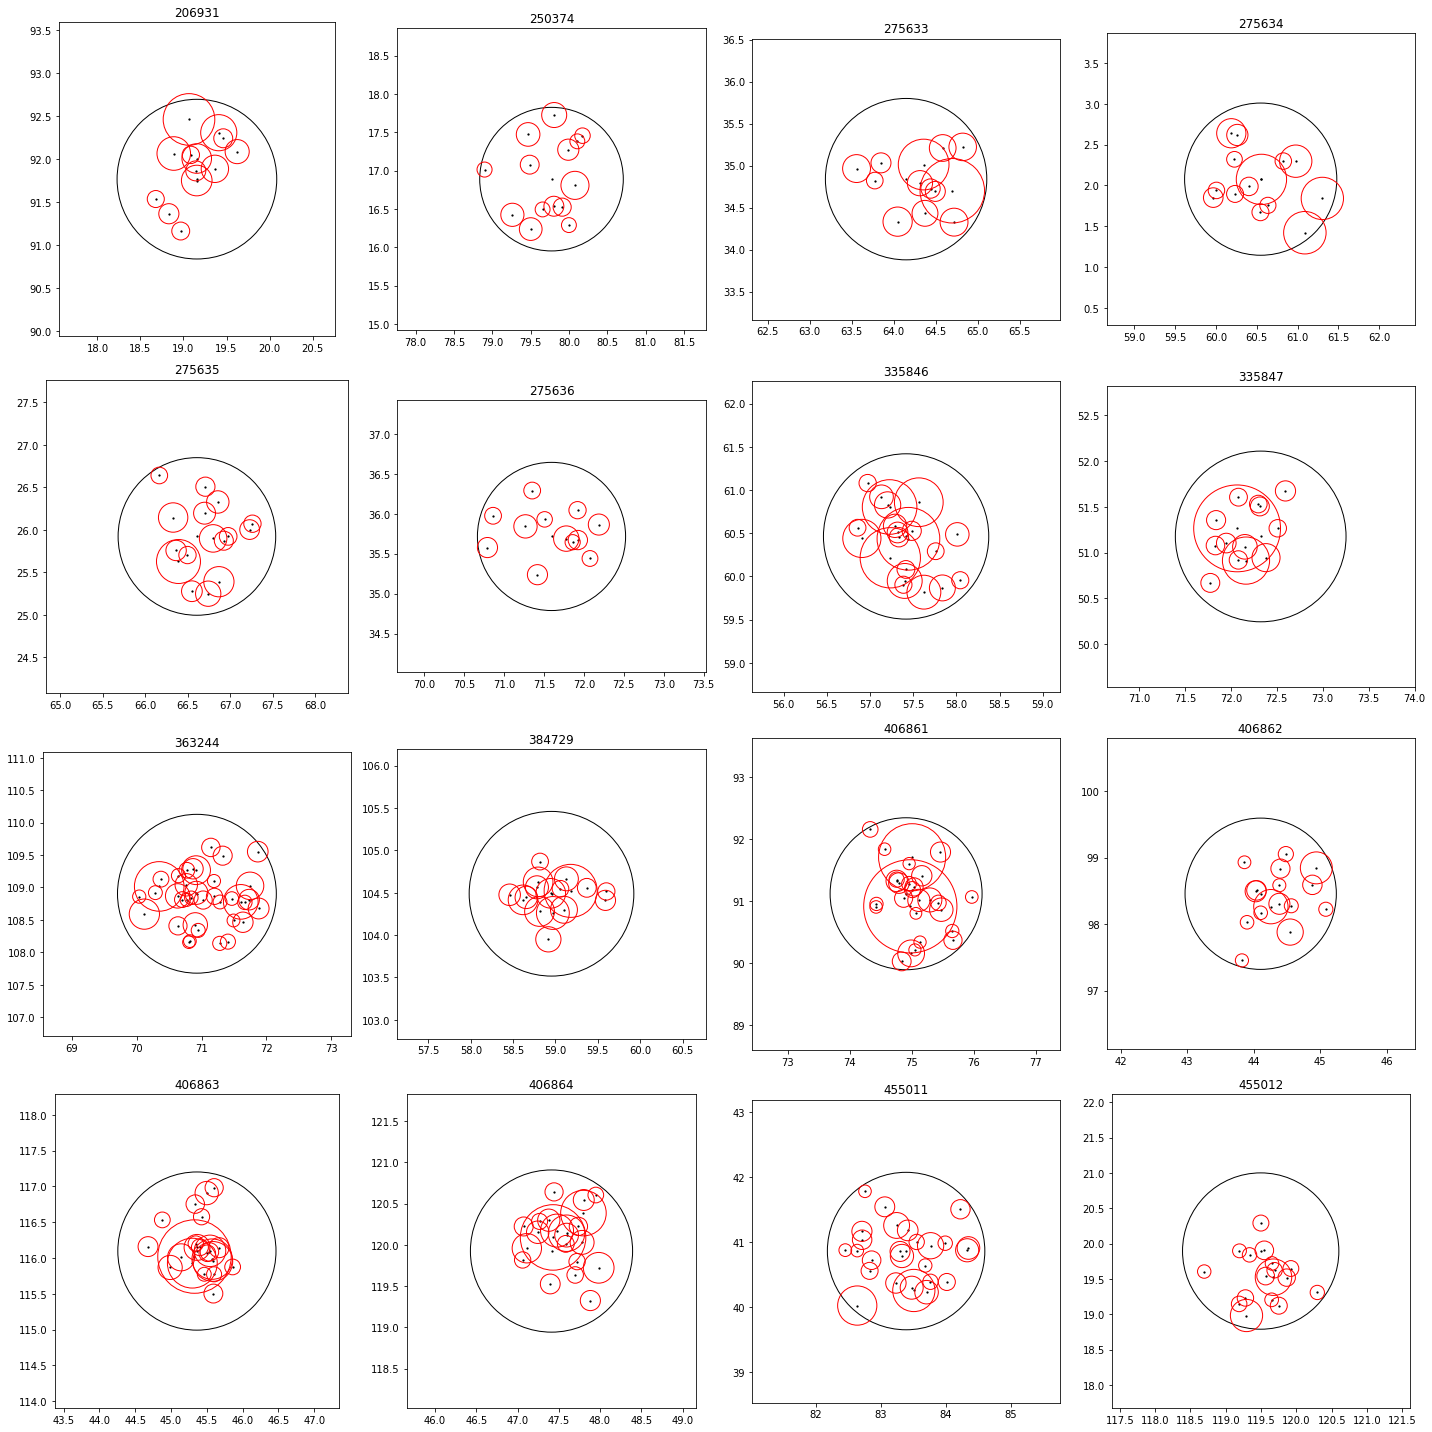

In [44]:
names = np.unique(name)
%matplotlib inline
names = np.insert(names, 0, 480875)
fig, ax = plt.subplots(4,4,figsize=(20,20))


counter = 16
for j in range(4):
    for k in range(4):
        ax[j,k].set_title(int(names[counter]))
        plot_subhalos_new(names[counter],1e11, ax[j,k])
        counter+=1

plt.tight_layout()
# plt.savefig('subhalos.png',dpi=500)


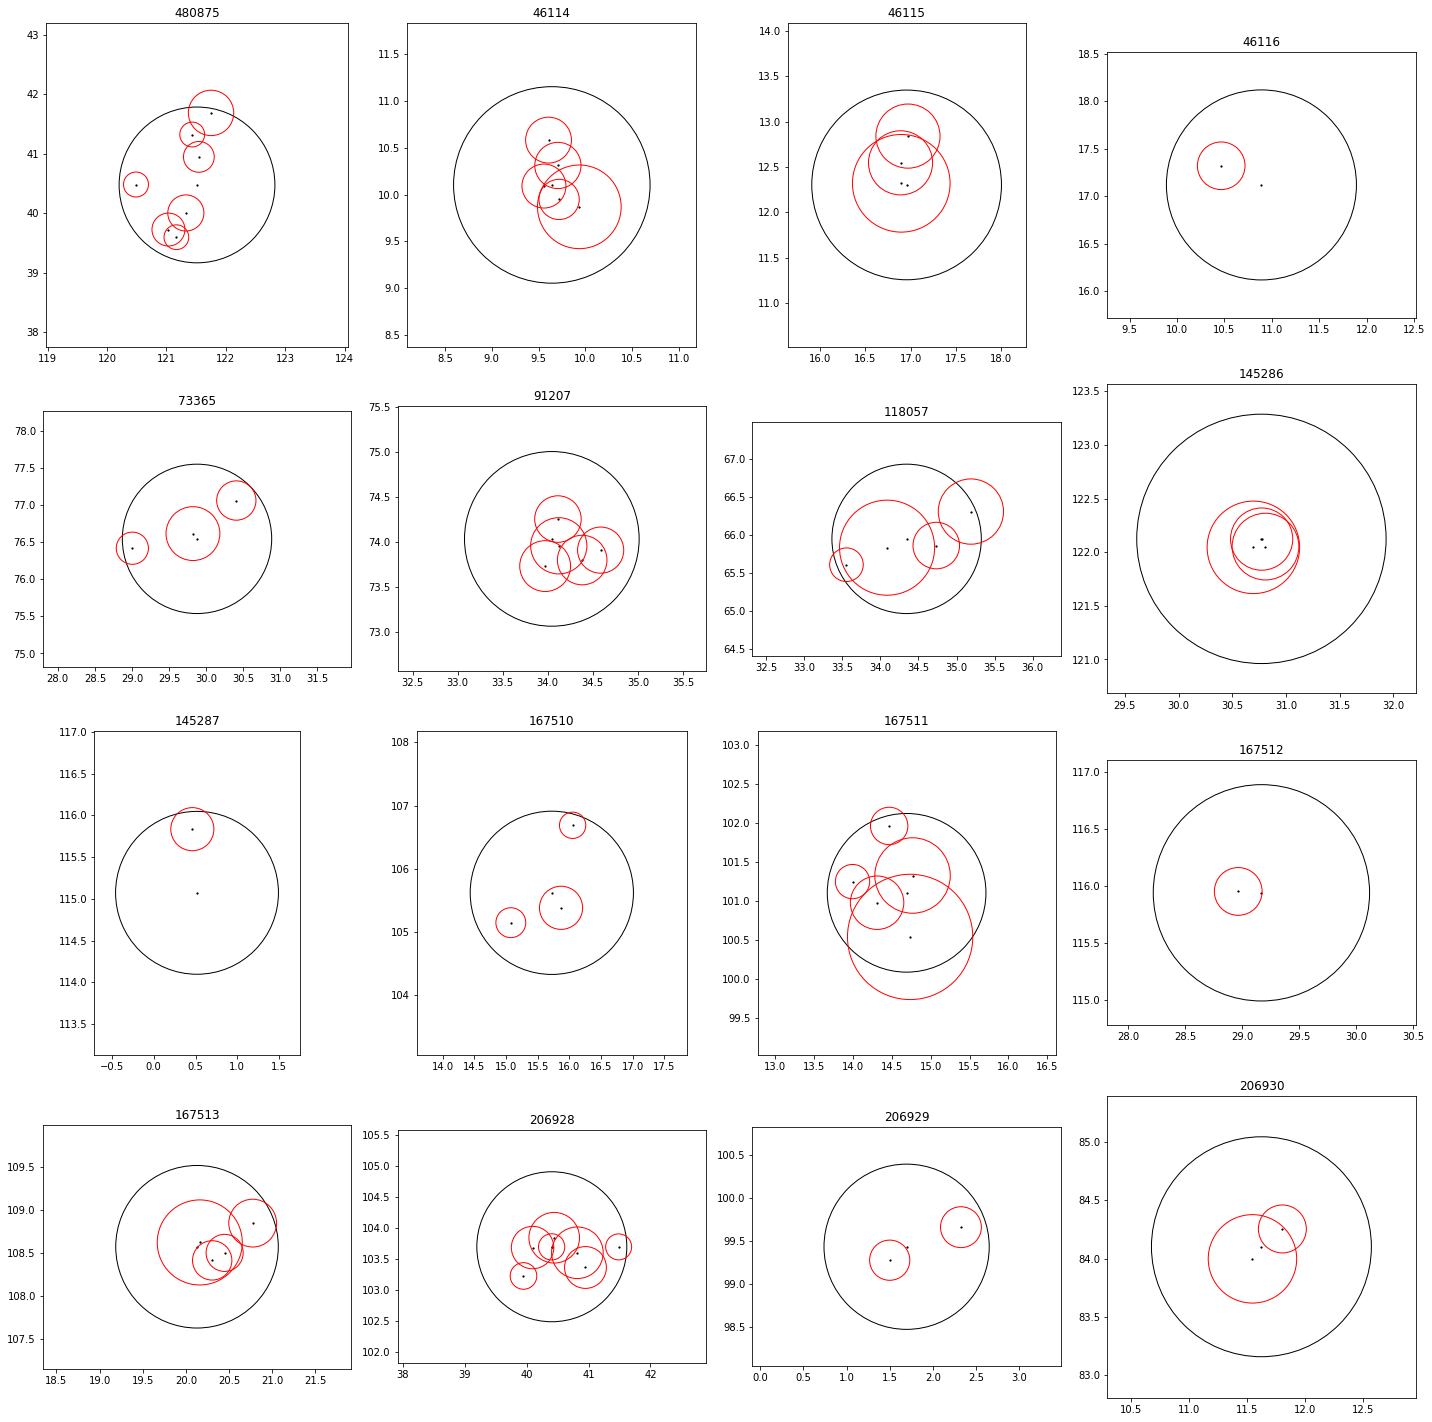

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# reading in the text file
name, m, r, x_pos, y_pos, z_pos = np.loadtxt("Chinchilla_L125_e1.dat",usecols=(0,3,4,8,9,10)).T

def plot_subhalos_new(index, minmass, ax):
    mask = np.logical_and((name==index), (m>=minmass))
    mvir, rvir, x, y, z = m[mask], r[mask], x_pos[mask], y_pos[mask], z_pos[mask]
    #print(mvir)
    draw_circle = plt.Circle((x[0], y[0]), rvir[0], fill=False, edgecolor='k')
    ax.add_artist(draw_circle)
    ax.scatter(x[0],y[0],c='k',s=1.5)
    
    for i in range(1, len(x)):
        draw_circle = plt.Circle((x[i], y[i]), rvir[i], fill=False, edgecolor='r')
        ax.add_artist(draw_circle)
        ax.scatter(x[i],y[i],c='k',s=1.5)

    xplotrange = max((x[0]-np.min(x)),(np.max(x)-x[0]))+rvir[0]+0.2
    ax.set_xlim(x[0]-xplotrange, x[0]+xplotrange)
    yplotrange = max((y[0]-np.min(y)),(np.max(y)-y[0]))+rvir[0]+0.2
    ax.set_ylim(y[0]-yplotrange, y[0]+yplotrange)
    
    ax.set_aspect(1)

names = np.unique(name)
%matplotlib inline
names = np.insert(names, 0, 480875)
fig, ax = plt.subplots(4,4,figsize=(20,20))


counter = 0
for j in range(4):
    for k in range(4):
        ax[j,k].set_title(int(names[counter]))
        plot_subhalos_new(names[counter],1e12, ax[j,k])
        counter+=1

plt.tight_layout()
plt.savefig('subhalos.png',dpi=500)
